Developing Prophet model at level 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from math import floor
from fbprophet import Prophet

import os 

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


#Load Data

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin1.csv')
df=df.drop(columns=['Unnamed: 0','Weekly_Sales','Weekly_Sales_log'])
df.describe()

,log_minMax
count,143.000000
mean,0.280161
std,0.142156
min,0.000000
25%,0.202600
50%,0.255249
75%,0.322615
max,1.000000


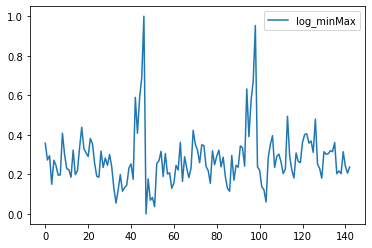

In [ ]:
df.plot()
plt.show()

#Model

##Model Prep

In [ ]:
#Prophet demands columns be designated as ds and y
df=df.rename(columns={'Date':'ds','log_minMax':'y'})

###Train, Validation, And Test Split

In [ ]:
trainInd=floor(len(df)*.8)
valInd=floor(len(df)*.9)
train=df.loc[:trainInd,:]
val=df['ds'][trainInd:valInd]
val=val.to_frame()
test=df['ds'][valInd:]
test=test.to_frame()

##Model Creation And Validation

In [ ]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=model.predict(val)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-04-13  0.331352    0.218489    0.451449
1 2012-04-20  0.314244    0.188135    0.438219
2 2012-04-27  0.268124    0.146059    0.380154
3 2012-05-04  0.235180    0.120985    0.351855
4 2012-05-11  0.244872    0.132232    0.366886


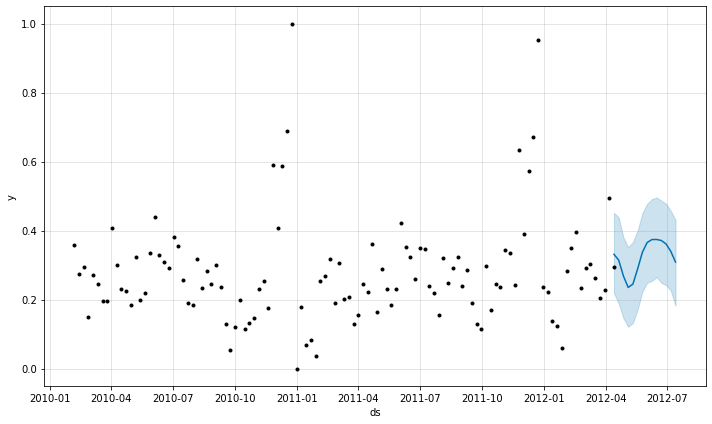

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000
mean,0.305513,0.204811,0.439850,0.305469,0.305552,0.016960,0.016960,0.016960,0.016960,0.016960,0.016960,0.0,0.0,0.0,0.322473
std,0.001831,0.048034,0.047833,0.001794,0.001867,0.046789,0.046789,0.046789,0.046789,0.046789,0.046789,0.0,0.0,0.0,0.047718
min,0.302667,0.120985,0.351855,0.302667,0.302667,-0.068800,-0.068800,-0.068800,-0.068800,-0.068800,-0.068800,0.0,0.0,0.0,0.235180
25%,0.304090,0.174104,0.407918,0.304080,0.304098,-0.011606,-0.011606,-0.011606,-0.011606,-0.011606,-0.011606,0.0,0.0,0.0,0.294125
50%,0.305513,0.220885,0.451205,0.305475,0.305542,0.030206,0.030206,0.030206,0.030206,0.030206,0.030206,0.0,0.0,0.0,0.334187
75%,0.306935,0.246956,0.478003,0.306864,0.307000,0.058111,0.058111,0.058111,0.058111,0.058111,0.058111,0.0,0.0,0.0,0.364280
max,0.308358,0.265405,0.496111,0.308250,0.308466,0.067796,0.067796,0.067796,0.067796,0.067796,0.067796,0.0,0.0,0.0,0.374248


In [ ]:
val_y=df['y'][trainInd:valInd]
y_hat=forecast.yhat

In [ ]:
val_y=val_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((val_y-y_hat)**2).sum()
mse=np.mean((val_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((val_y-y_hat)**2)))

Final rmse value is = 0.061195345538576106


##Run Model Against Test Set

In [ ]:
forecast=model.predict(test)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-07-20  0.276421    0.152200    0.390734
1 2012-07-27  0.254224    0.134824    0.361894
2 2012-08-03  0.254186    0.135914    0.377042
3 2012-08-10  0.281092    0.164151    0.387635
4 2012-08-17  0.321720    0.197733    0.443691


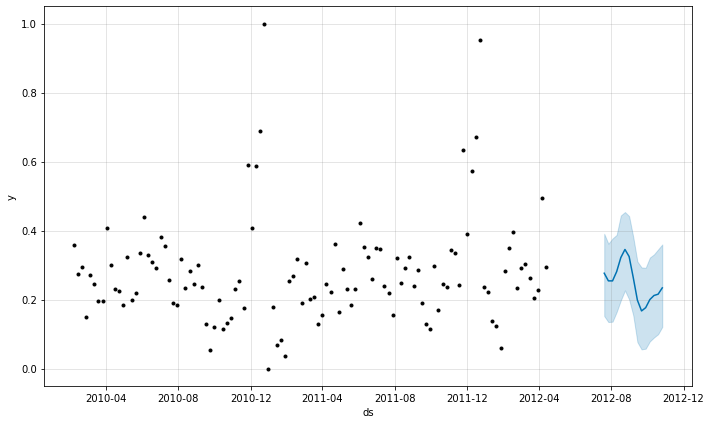

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0,15.000000
mean,0.311860,0.129687,0.366117,0.311653,0.312107,-0.063534,-0.063534,-0.063534,-0.063534,-0.063534,-0.063534,0.0,0.0,0.0,0.248326
std,0.001958,0.053462,0.052424,0.001885,0.002042,0.055943,0.055943,0.055943,0.055943,0.055943,0.055943,0.0,0.0,0.0,0.054789
min,0.308796,0.055581,0.292080,0.308695,0.308920,-0.145650,-0.145650,-0.145650,-0.145650,-0.145650,-0.145650,0.0,0.0,0.0,0.167086
25%,0.310328,0.084462,0.326365,0.310180,0.310508,-0.107915,-0.107915,-0.107915,-0.107915,-0.107915,-0.107915,0.0,0.0,0.0,0.205915
50%,0.311860,0.134824,0.361894,0.311656,0.312100,-0.055486,-0.055486,-0.055486,-0.055486,-0.055486,-0.055486,0.0,0.0,0.0,0.254186
75%,0.313392,0.159197,0.389184,0.313131,0.313705,-0.030696,-0.030696,-0.030696,-0.030696,-0.030696,-0.030696,0.0,0.0,0.0,0.278757
max,0.314924,0.226559,0.453789,0.314597,0.315313,0.034345,0.034345,0.034345,0.034345,0.034345,0.034345,0.0,0.0,0.0,0.345329


In [ ]:
test_y=df['y'][valInd:]
y_hat=forecast.yhat

In [ ]:
test_y=test_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((test_y-y_hat)**2).sum()
mse=np.mean((test_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((test_y-y_hat)**2)))

Final rmse value is = 0.05142232801462495


#Pickeling the model

In [ ]:
pickle.dump(model,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/W_Stores1_Prophet.sav','wb'))